# Neural Networks with keras and tensorflow

N.B. You will need to pip install keras and tensorflow!

In [1]:
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

For this lesson we'll use sklearn's built-in breast cancer dataset. The next cell loads the data and prints the data description.

In [2]:
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
# Splitting our data and initializing a Scaler
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

In [4]:
ss = StandardScaler()
ss.fit(X_train)

X_train_s = ss.transform(X_train)
X_test_s = ss.transform(X_test)

In [5]:
X_train_s.shape, X_test_s.shape

((426, 30), (143, 30))

## Constructing a Neural Network in Keras

In [6]:
# Importing model and layer types

from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [7]:
# import optimizer

from keras.optimizers import Adam

In [8]:
# initialize model
model = Sequential()

# how many input neurons do you want
inputs = X_train_s.shape[1]

# how many hidden neurons in the hidden layer
hiddens = inputs

# input to hidden
model.add(Dense(hiddens, activation='relu', input_dim=inputs))

# hidden to output
model.add(Dense(1))

# initialize optimizer
adam = Adam()

# compile the model
model.compile(optimizer=adam, loss='mean_squared_error')

In [9]:
# Fitting our model
history = model.fit(X_train_s, y_train, validation_data=(X_test_s, y_test), epochs=100)

Train on 426 samples, validate on 143 samples
Epoch 1/100
426/426 [==============================] - 0s 336us/step - loss: 0.5744 - val_loss: 0.5272
Epoch 2/100
426/426 [==============================] - 0s 56us/step - loss: 0.3450 - val_loss: 0.3422
Epoch 3/100
426/426 [==============================] - 0s 47us/step - loss: 0.2472 - val_loss: 0.2634
Epoch 4/100
426/426 [==============================] - 0s 54us/step - loss: 0.1896 - val_loss: 0.2180
Epoch 5/100
426/426 [==============================] - 0s 55us/step - loss: 0.1571 - val_loss: 0.1885
Epoch 6/100
426/426 [==============================] - 0s 49us/step - loss: 0.1360 - val_loss: 0.1654
Epoch 7/100
426/426 [==============================] - 0s 50us/step - loss: 0.1210 - val_loss: 0.1524
Epoch 8/100
426/426 [==============================] - 0s 52us/step - loss: 0.1084 - val_loss: 0.1387
Epoch 9/100
426/426 [==============================] - 0s 46us/step - loss: 0.0985 - val_loss: 0.1284
Epoch 10/100
426/426 [=============

426/426 [==============================] - 0s 49us/step - loss: 0.0213 - val_loss: 0.0645
Epoch 81/100
426/426 [==============================] - 0s 48us/step - loss: 0.0204 - val_loss: 0.0618
Epoch 82/100
426/426 [==============================] - 0s 45us/step - loss: 0.0206 - val_loss: 0.0609
Epoch 83/100
426/426 [==============================] - 0s 47us/step - loss: 0.0200 - val_loss: 0.0634
Epoch 84/100
426/426 [==============================] - 0s 46us/step - loss: 0.0201 - val_loss: 0.0631
Epoch 85/100
426/426 [==============================] - 0s 47us/step - loss: 0.0195 - val_loss: 0.0647
Epoch 86/100
426/426 [==============================] - 0s 47us/step - loss: 0.0197 - val_loss: 0.0633
Epoch 87/100
426/426 [==============================] - 0s 47us/step - loss: 0.0192 - val_loss: 0.0637
Epoch 88/100
426/426 [==============================] - 0s 45us/step - loss: 0.0196 - val_loss: 0.0628
Epoch 89/100
426/426 [==============================] - 0s 47us/step - loss: 0.0194 - 

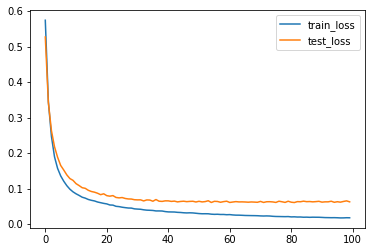

In [10]:
# Plotting our losses
%matplotlib inline

train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='train_loss')
plt.plot(test_loss, label='test_loss')

plt.legend()

## Tensorflow

In [11]:
import tensorflow as tf

### Tensorflow as a graph constructor

In [16]:
# Constructing the graph

a = tf.Variable(4)
b = tf.Variable(5)

c = a + b
d = a + c * b

In [17]:
# Starting a session

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result = sess.run(d)

In [18]:
# Printing the output

print(result)

49


### Neural Network

In [19]:
X_train_s.shape

(426, 30)

In [20]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, 30))
y = tf.placeholder(dtype=tf.float32, shape=(None, 1))

hid = tf.layers.dense(X, 30, activation=tf.nn.relu)
y_hat = tf.layers.dense(hid, 1, activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)
optimizer = tf.train.AdamOptimizer(0.01)
training_run = optimizer.minimize(loss)

saver = tf.train.Saver()

In [22]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for _ in range(100):
        sess.run(training_run, feed_dict={X: X_train_s, y: y_train.reshape(-1, 1)})
        
    pred = sess.run(y_hat, feed_dict={X: X_test})

classes = (pred > 0.5).astype(int)

metrics.accuracy_score(y_test.reshape(-1, 1), classes)

0.3776223776223776

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,